<a href="https://colab.research.google.com/github/laila2005/Breast-Cancer-Classifier/blob/main/Breast_Cancer_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading 'breastCancer (1).csv' from previous upload
Target class distribution:
Classification
2    2216
1    1784
Name: count, dtype: int64
Dataset size: 4000 samples
Cross-validation scores: [0.5296875 0.54375   0.5078125 0.5296875 0.54375  ]
Mean CV score: 0.531 (+/- 0.026)

Test Set Accuracy: 0.549

Classification Report:
               precision    recall  f1-score   support

     Healthy       0.48      0.17      0.25       357
      Cancer       0.56      0.86      0.68       443

    accuracy                           0.55       800
   macro avg       0.52      0.51      0.46       800
weighted avg       0.53      0.55      0.49       800



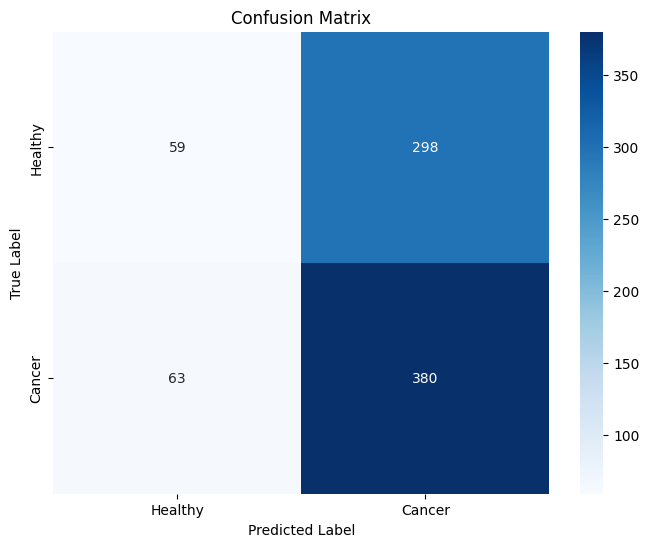

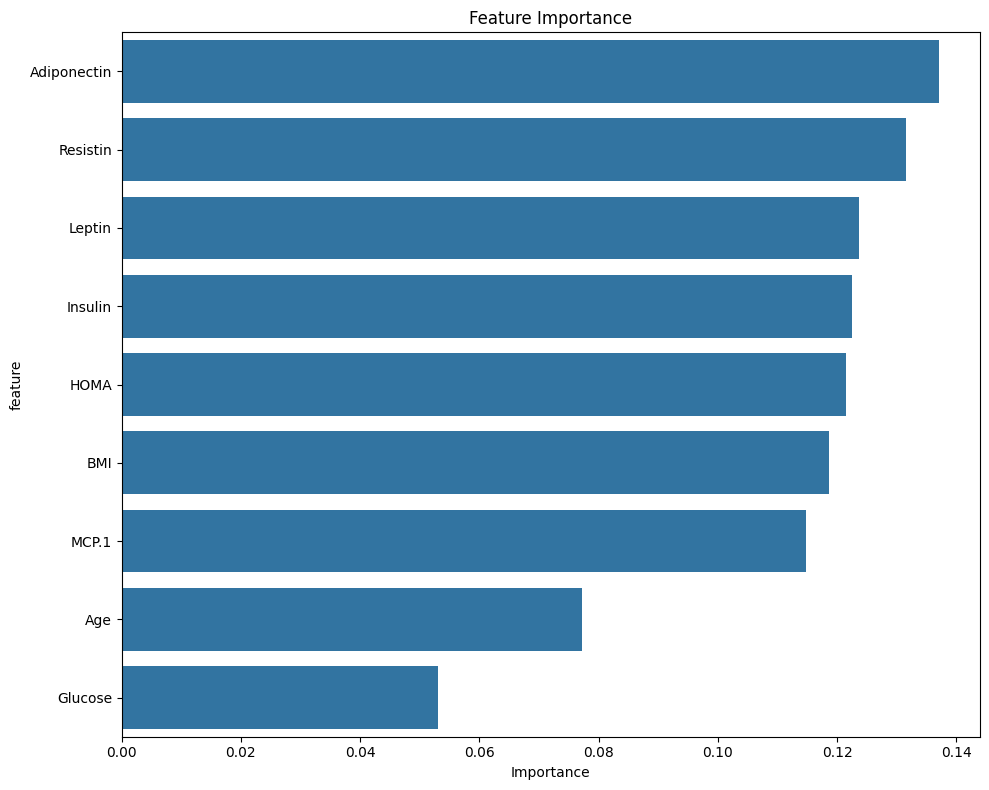

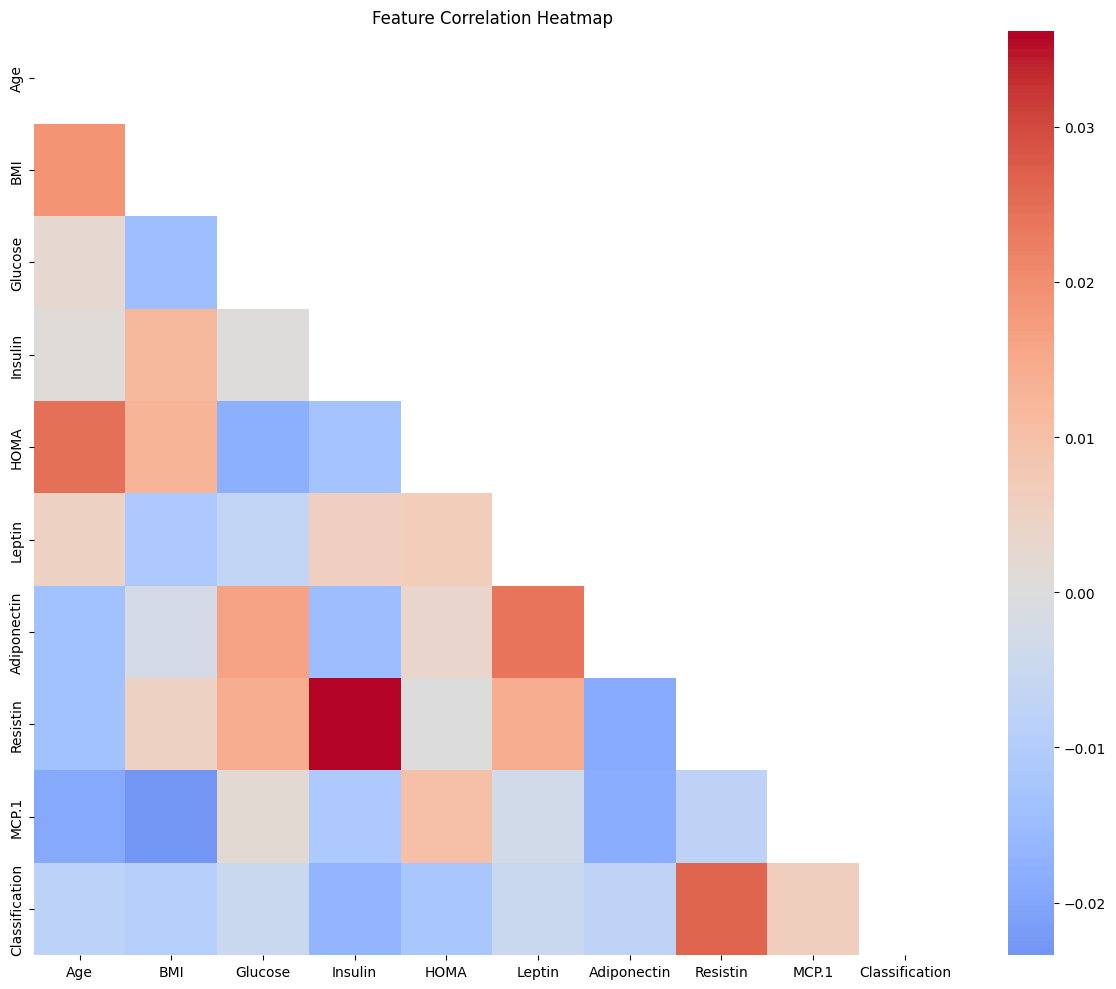


Model and scaler saved successfully
Mounted at /content/drive


In [11]:
#!/usr/bin/env python3

"""
Breast Cancer Classification Project
This script uses the Breast Cancer Coimbra dataset from Kaggle (4000 samples) in Google Colab
to train a classifier that predicts breast cancer (healthy vs. cancer).
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from google.colab import files

# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Load dataset
# Note: File saved as 'breastCancer (1).csv' due to Colab naming
print("Loading 'breastCancer (1).csv' from previous upload")
try:
    df = pd.read_csv('breastCancer (1).csv')
except FileNotFoundError:
    print("Please upload 'breastCancer.csv' from Kaggle (Breast Cancer Coimbra Data Set)")
    uploaded = files.upload()
    df = pd.read_csv('breastCancer (1).csv')

# Preprocess dataset
# Features: Age, BMI, Glucose, etc.; Target: Classification (0=Healthy, 1=Cancer)
df = df.dropna()  # Drop missing values

# Verify target classes
print("Target class distribution:")
print(df['Classification'].value_counts())

X = df.drop('Classification', axis=1)
y = df['Classification']

print(f"Dataset size: {len(df)} samples")

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train classifier
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=RANDOM_SEED,
    n_jobs=-1
)
clf.fit(X_train_scaled, y_train)

# Perform cross-validation
cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score: {:.3f} (+/- {:.3f})".format(cv_scores.mean(), cv_scores.std() * 2))

# Predict and evaluate
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Healthy', 'Cancer'])

# Output results
print("\nTest Set Accuracy: {:.3f}".format(accuracy))
print("\nClassification Report:\n", report)

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Cancer'], yticklabels=['Healthy', 'Cancer'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature Importance Plot
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': clf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# Save the model and scaler
joblib.dump(clf, 'breast_cancer_classifier.joblib')
joblib.dump(scaler, 'scaler.joblib')
print("\nModel and scaler saved successfully")

# Save to Google Drive
from google.colab import drive
drive.mount('/content/drive')
!cp breast_cancer_classifier.joblib /content/drive/MyDrive/
!cp scaler.joblib /content/drive/MyDrive/